In [46]:
import requests
import json
from config import api_key
from datetime import datetime

In [47]:
####Find All fields from JSON###

# URL for GET requests to retrieve historical hospitalization data
url = "https://api.covidactnow.org/v2/county/TX.timeseries.json?"

# Date range for March 2021
start_date = "2021-03-01"
end_date = "2021-03-03"  # Adjusted to cover the full month of March 2021

# Query URL with date range and API key
query_url = f"{url}apiKey={api_key}&start={start_date}&end={end_date}"

# Function to recursively collect field names from a JSON object/dictionary
def collect_fields(json_obj, fields_set, parent_key=''):
    if isinstance(json_obj, dict):
        for key, value in json_obj.items():
            # Constructing a "path" for nested fields
            new_key = f"{parent_key}.{key}" if parent_key else key
            fields_set.add(new_key)
            collect_fields(value, fields_set, new_key)
    elif isinstance(json_obj, list):
        for item in json_obj:
            collect_fields(item, fields_set, parent_key)

# Function to fetch and parse the JSON data from the API
def fetch_data_and_fields(url):
    response = requests.get(url)
    response_json = response.json()
    
    fields_set = set()
    collect_fields(response_json, fields_set)
    
    return list(fields_set)

# Fetching data and collecting fields
fields = fetch_data_and_fields(query_url)

# Printing the number of different fields
print(f"Total number of different fields: {len(fields)}")

# Printing the list of all fields
for field in sorted(fields):
    print(field)

Total number of different fields: 284
actuals
actuals.cases
actuals.contactTracers
actuals.deaths
actuals.hospitalBeds
actuals.hospitalBeds.capacity
actuals.hospitalBeds.currentUsageCovid
actuals.hospitalBeds.currentUsageTotal
actuals.hospitalBeds.weeklyCovidAdmissions
actuals.hsaHospitalBeds
actuals.hsaHospitalBeds.capacity
actuals.hsaHospitalBeds.currentUsageCovid
actuals.hsaHospitalBeds.currentUsageTotal
actuals.hsaHospitalBeds.weeklyCovidAdmissions
actuals.hsaIcuBeds
actuals.hsaIcuBeds.capacity
actuals.hsaIcuBeds.currentUsageCovid
actuals.hsaIcuBeds.currentUsageTotal
actuals.icuBeds
actuals.icuBeds.capacity
actuals.icuBeds.currentUsageCovid
actuals.icuBeds.currentUsageTotal
actuals.negativeTests
actuals.newCases
actuals.newDeaths
actuals.positiveTests
actuals.vaccinationsAdditionalDose
actuals.vaccinationsCompleted
actuals.vaccinationsFall2022BivalentBooster
actuals.vaccinationsInitiated
actuals.vaccinationsInitiatedDemographics
actuals.vaccinationsInitiatedDemographics.age
actuals

In [48]:
# Make a GET request to retrieve the historical data
response = requests.get(query_url)
covid_data = response.json()

# Extract and process hospitalization data for March 2021
hospitalizations_march_2021 = []
for county_data in covid_data:
    county_name = county_data["county"]
    hospitalizations = county_data["actuals"]["hospitalBeds"]
    hospitalizations_march_2021.append({"County": county_name, "Hospitalizations": hospitalizations})

# Print hospitalization data for March 2021
for data in hospitalizations_march_2021:
    print(f"County: {data['County']}, Hospitalizations in March 2021: {data['Hospitalizations']}")

County: Anderson County, Hospitalizations in March 2021: {'capacity': 91, 'currentUsageTotal': 29, 'currentUsageCovid': 0, 'weeklyCovidAdmissions': 6}
County: Andrews County, Hospitalizations in March 2021: {'capacity': 37, 'currentUsageTotal': 10, 'currentUsageCovid': 0, 'weeklyCovidAdmissions': 4}
County: Angelina County, Hospitalizations in March 2021: {'capacity': 177, 'currentUsageTotal': 151, 'currentUsageCovid': 1, 'weeklyCovidAdmissions': 7}
County: Aransas County, Hospitalizations in March 2021: {'capacity': None, 'currentUsageTotal': None, 'currentUsageCovid': None, 'weeklyCovidAdmissions': None}
County: Archer County, Hospitalizations in March 2021: {'capacity': None, 'currentUsageTotal': None, 'currentUsageCovid': None, 'weeklyCovidAdmissions': None}
County: Armstrong County, Hospitalizations in March 2021: {'capacity': None, 'currentUsageTotal': None, 'currentUsageCovid': None, 'weeklyCovidAdmissions': None}
County: Atascosa County, Hospitalizations in March 2021: {'capaci

In [49]:
# Make a GET request to retrieve the historical data
response = requests.get(query_url)
covid_data = response.json()

# Ensure covid_data is a list of dictionaries; each dictionary represents a county
hospitalizations_march_2021 = []
for county_data in covid_data:
    county_name = county_data["county"]
    # Check if 'actualsTimeseries' is a list and iterate through it
    for date_entry in county_data["actualsTimeseries"]:
        date = date_entry.get("date")
        # Filter for March 2021 entries
        if date.startswith("2021-03"):
            # Assuming 'hospitalBeds' data exists and is structured as needed
            hospitalizations = date_entry.get("hsaHospitalBeds", {})
            # Append a new entry for each date in March 2021
            hospitalizations_march_2021.append({
                "County": county_name,
                "Date": date,
                "Hospitalizations": hospitalizations
            })

# Printing the number of different fields
print(f"Total hospitalization entries for March 2021: {len(hospitalizations_march_2021)}\n")

# Adjusted print to include date
for data in hospitalizations_march_2021:
    print(f"County: {data['County']}, Date: {data['Date']}, Hospitalizations: {data['Hospitalizations']}")

Total hospitalization entries for March 2021: 7874

County: Anderson County, Date: 2021-03-01, Hospitalizations: {'capacity': None, 'currentUsageTotal': None, 'currentUsageCovid': None, 'weeklyCovidAdmissions': None}
County: Anderson County, Date: 2021-03-02, Hospitalizations: {'capacity': None, 'currentUsageTotal': None, 'currentUsageCovid': None, 'weeklyCovidAdmissions': None}
County: Anderson County, Date: 2021-03-03, Hospitalizations: {'capacity': None, 'currentUsageTotal': None, 'currentUsageCovid': None, 'weeklyCovidAdmissions': None}
County: Anderson County, Date: 2021-03-04, Hospitalizations: {'capacity': 264, 'currentUsageTotal': 75, 'currentUsageCovid': 14, 'weeklyCovidAdmissions': 12}
County: Anderson County, Date: 2021-03-05, Hospitalizations: {'capacity': None, 'currentUsageTotal': None, 'currentUsageCovid': None, 'weeklyCovidAdmissions': None}
County: Anderson County, Date: 2021-03-06, Hospitalizations: {'capacity': 263, 'currentUsageTotal': 80, 'currentUsageCovid': 15, '

In [50]:
# Make a GET request to retrieve the historical data
response = requests.get(query_url)
covid_data = response.json()

# Ensure covid_data is a list of dictionaries; each dictionary represents a county
hospitalizations_march_2021 = []

for county_data in covid_data:
    county_name = county_data["county"]
    
    # Check if 'actualsTimeseries' is a list and iterate through it
    for date_entry in county_data["actualsTimeseries"]:
        date = date_entry.get("date")
        
        # Filter for March 2021 entries
        if date.startswith("2021-03"):
            hospitalizations = date_entry.get("hsaHospitalBeds", {})
            
            # Check if 'hospitalizations' data exists and does not contain any "none" values
            if hospitalizations and not any(value == "none" for value in hospitalizations.values()):
                # Check if specific keys have values other than None
                if all(key not in hospitalizations or hospitalizations[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
                    # Append a new entry for each date in March 2021
                    hospitalizations_march_2021.append({
                        "County": county_name,
                        "Date": date,
                        "Hospitalizations": hospitalizations
                    })

# Printing the number of different fields
print(f"Total hospitalization entries for March 2021: {len(hospitalizations_march_2021)}\n")

# Adjusted print to include date for data in hospitalizations_march_2021
for data in hospitalizations_march_2021:
    print(f"County: {data['County']}, Date: {data['Date']}, Hospitalizations: {data['Hospitalizations']}")


Total hospitalization entries for March 2021: 1590

County: Anderson County, Date: 2021-03-04, Hospitalizations: {'capacity': 264, 'currentUsageTotal': 75, 'currentUsageCovid': 14, 'weeklyCovidAdmissions': 12}
County: Angelina County, Date: 2021-03-04, Hospitalizations: {'capacity': 401, 'currentUsageTotal': 325, 'currentUsageCovid': 53, 'weeklyCovidAdmissions': 19}
County: Angelina County, Date: 2021-03-06, Hospitalizations: {'capacity': 403, 'currentUsageTotal': 319, 'currentUsageCovid': 52, 'weeklyCovidAdmissions': 14}
County: Angelina County, Date: 2021-03-11, Hospitalizations: {'capacity': 394, 'currentUsageTotal': 319, 'currentUsageCovid': 47, 'weeklyCovidAdmissions': 8}
County: Angelina County, Date: 2021-03-13, Hospitalizations: {'capacity': 388, 'currentUsageTotal': 314, 'currentUsageCovid': 46, 'weeklyCovidAdmissions': 9}
County: Angelina County, Date: 2021-03-18, Hospitalizations: {'capacity': 390, 'currentUsageTotal': 286, 'currentUsageCovid': 40, 'weeklyCovidAdmissions': 1

/var/folders/x4/mrrbmjqs67s5mz2tvrzkw7lh0000gn/T/ipykernel_1417/601458418.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


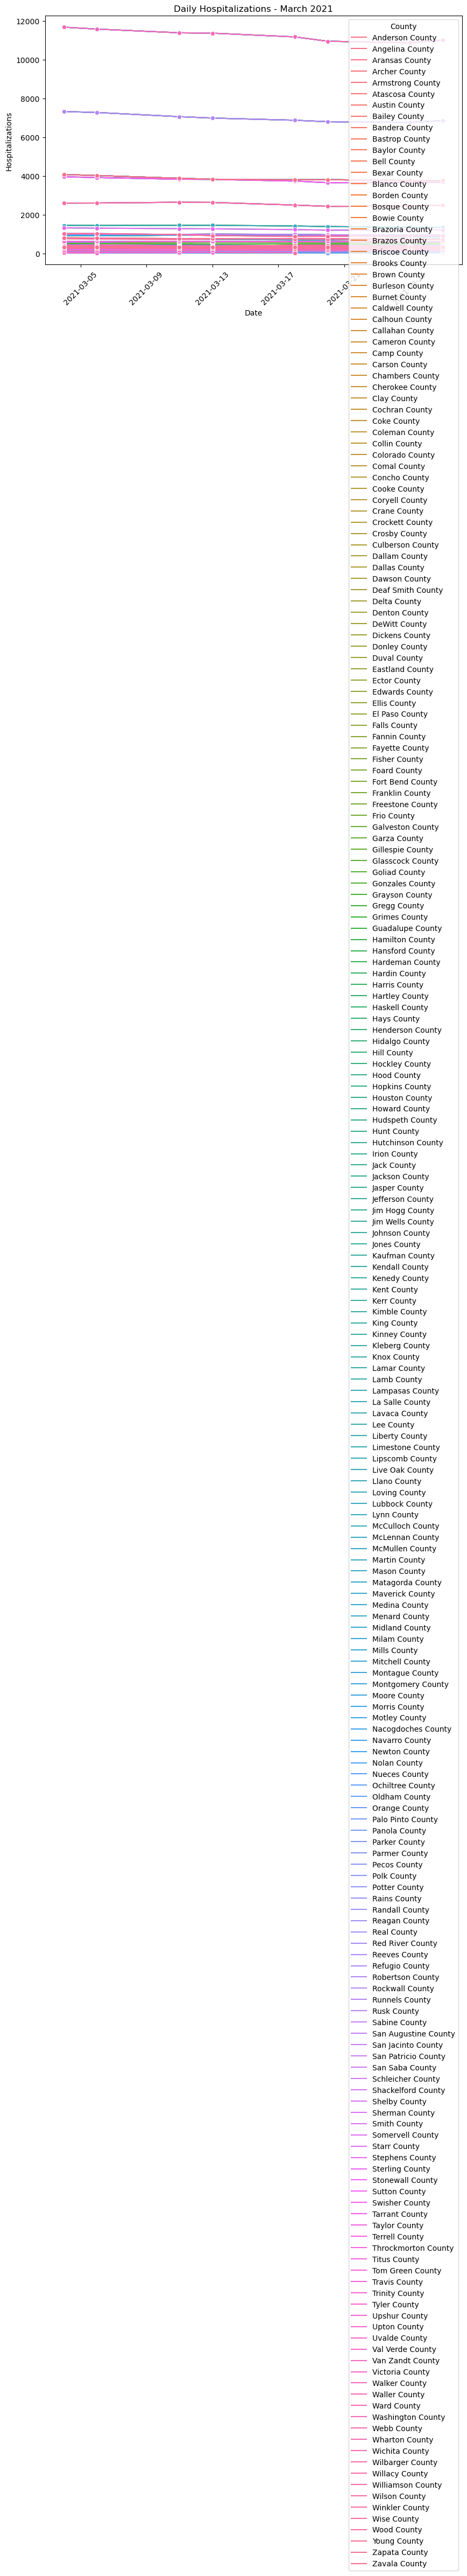

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot module

# Convert hospitalizations data to a pandas DataFrame
hospitalizations_df = pd.DataFrame(hospitalizations_march_2021)

# Flatten the nested dictionary structure to make it accessible
hospitalizations_df = pd.concat([hospitalizations_df.drop(['Hospitalizations'], axis=1), hospitalizations_df['Hospitalizations'].apply(pd.Series)], axis=1)

# Filter data for March 2021
hospitalizations_df['Date'] = pd.to_datetime(hospitalizations_df['Date'])
march_2021_data = hospitalizations_df[hospitalizations_df['Date'].dt.month == 3]

# Plot time series line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=march_2021_data, x='Date', y='currentUsageTotal', hue='County', marker='o')
plt.title('Daily Hospitalizations - March 2021')
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


/var/folders/x4/mrrbmjqs67s5mz2tvrzkw7lh0000gn/T/ipykernel_1417/2867903271.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


True

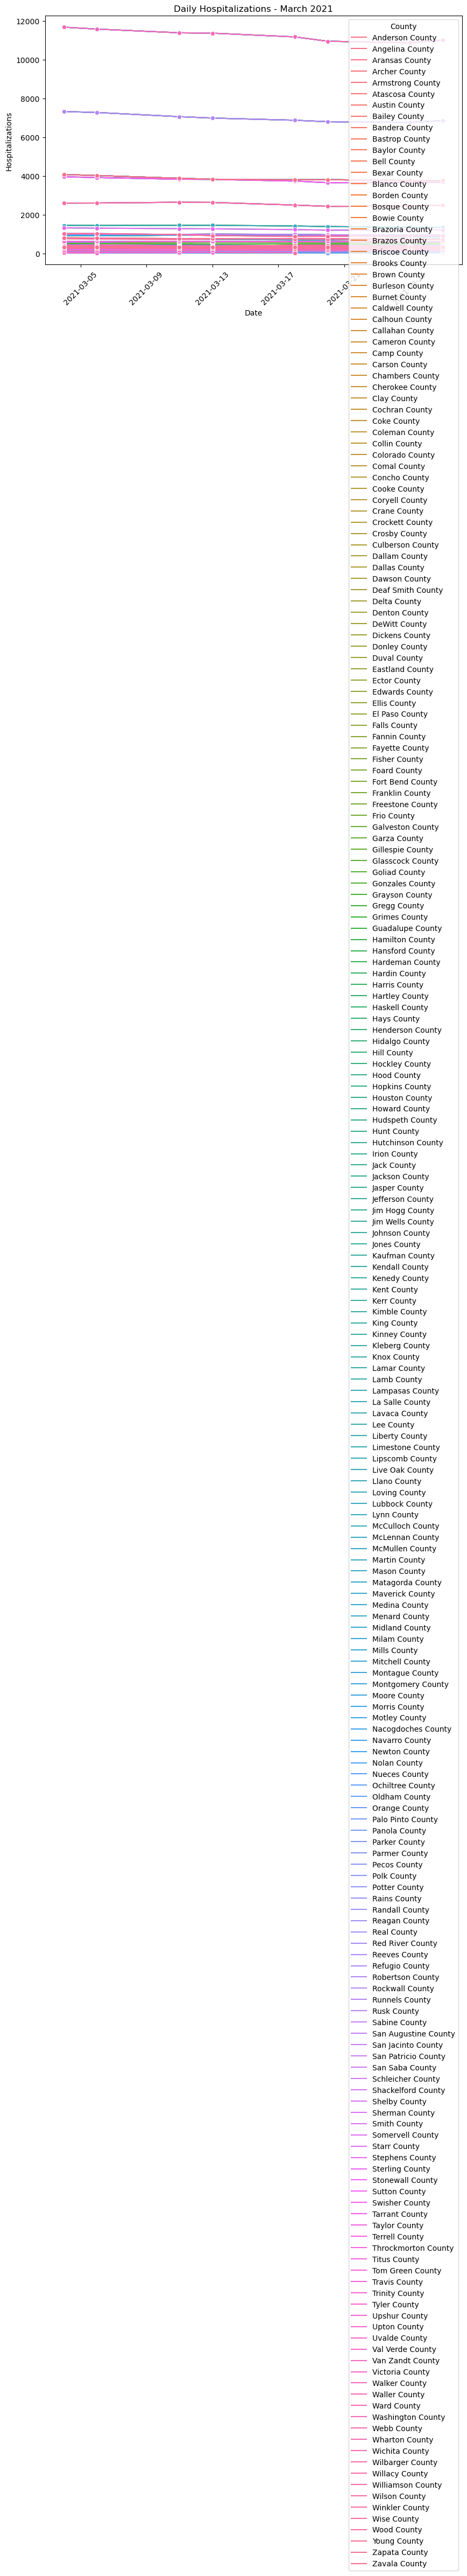

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Generate the plot (using seaborn in this example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=march_2021_data, x='Date', y='currentUsageTotal', hue='County', marker='o')
plt.title('Daily Hospitalizations - March 2021')
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image
plt.savefig('hospitalizations_plot.png')

# Create an HTML file
html_content = """
<!DOCTYPE html>
<html>
<head>
<title>Hospitalizations Plot</title>
</head>
<body>

<h2>Daily Hospitalizations - March 2021</h2>
<img src="hospitalizations_plot.png" alt="Hospitalizations Plot">

</body>
</html>
"""

# Write the HTML content to a file
with open('hospitalizations_plot.html', 'w') as f:
    f.write(html_content)

# Open the HTML file in a web browser
import webbrowser
webbrowser.open('hospitalizations_plot.html')


/var/folders/x4/mrrbmjqs67s5mz2tvrzkw7lh0000gn/T/ipykernel_1417/796624615.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


TypeError: Object of type Timestamp is not JSON serializable

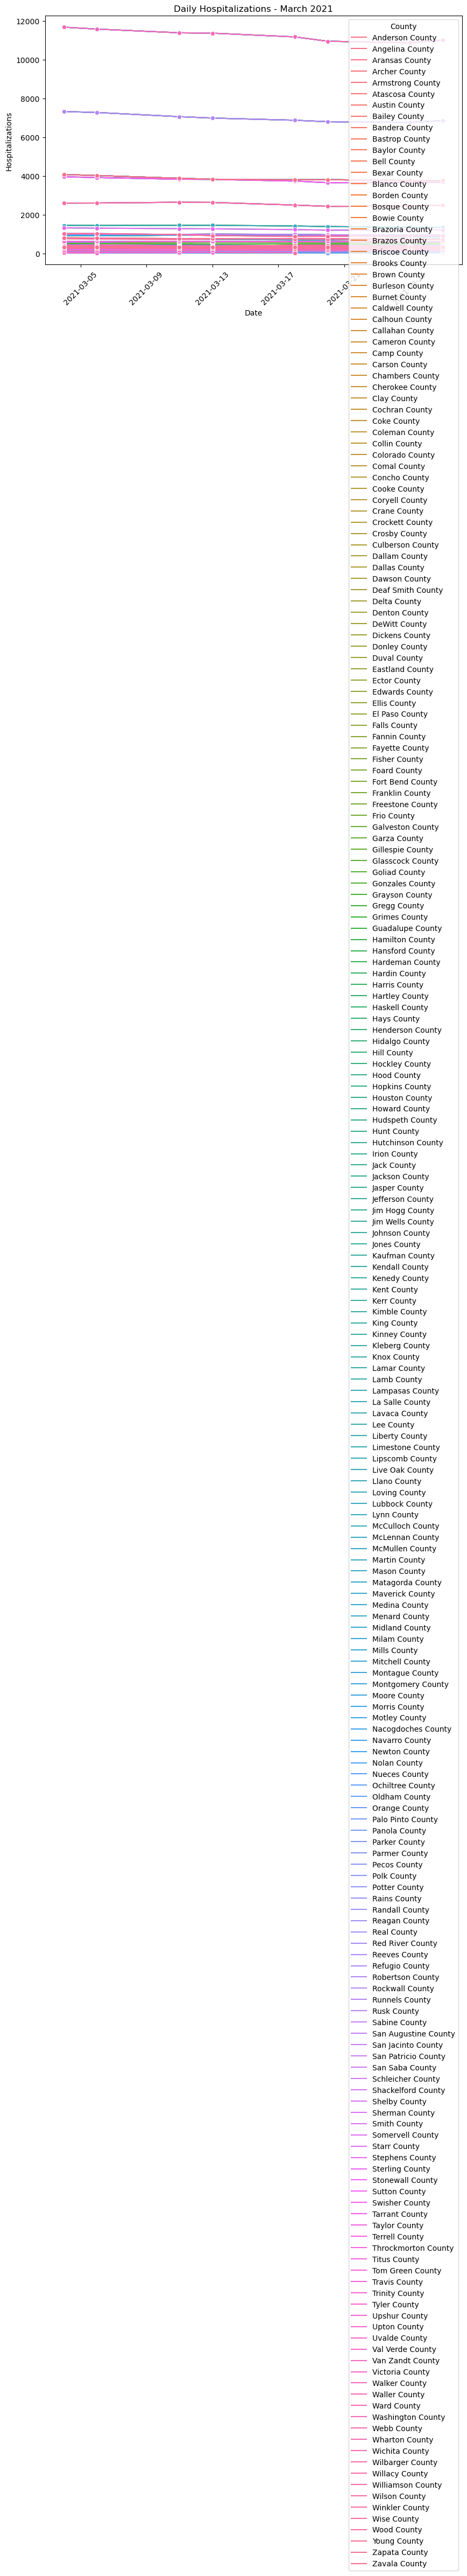

In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

# Assuming 'Date' column is currently string format, convert it to datetime
march_2021_data['Date'] = pd.to_datetime(march_2021_data['Date'])

# Generate the plot data (using seaborn in this example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=march_2021_data, x='Date', y='currentUsageTotal', hue='County', marker='o')
plt.title('Daily Hospitalizations - March 2021')
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image
plt.savefig('hospitalizations_plot.png')

# Create a dictionary to map county names to their corresponding data
county_data_map = {}
for county in march_2021_data['County'].unique():
    county_data = march_2021_data[march_2021_data['County'] == county]
    county_data_map[county] = {'Date': county_data['Date'].tolist(), 'Hospitalizations': county_data['currentUsageTotal'].tolist()}

# Generate HTML content with embedded JavaScript for interactivity
html_content = f"""
<!DOCTYPE html>
<html>
<head>
  <title>Hospitalizations Plot</title>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
<body>

<h2>Daily Hospitalizations - March 2021</h2>

<div>
  <label for="county-select">Select County:</label>
  <select id="county-select" onchange="updatePlot()">
    <option value="" disabled selected>Select a county</option>
"""

# Add options for each county in the dropdown menu
for county in county_data_map.keys():
    html_content += f'    <option value="{county}">{county}</option>\n'

# Complete the HTML content with JavaScript function for updating the plot
html_content += """
  </select>
</div>

<div id="plot"></div>

<script>
function updatePlot() {
  var county = document.getElementById("county-select").value;
  var data = """ + json.dumps(county_data_map) + """;
  var countyData = data[county];
  
  var dates = countyData['Date'];
  var hospitalizations = countyData['Hospitalizations'];

  var trace = {
    x: dates,
    y: hospitalizations,
    mode: 'lines+markers',
    type: 'scatter'
  };

  var layout = {
    title: 'Daily Hospitalizations - ' + county + ' - March 2021',
    xaxis: {title: 'Date'},
    yaxis: {title: 'Hospitalizations'},
    autosize: true
  };

  var plotData = [trace];
  Plotly.newPlot('plot', plotData, layout);
}

updatePlot();  // Call the function to initialize the plot
</script>

</body>
</html>
"""

# Write the HTML content to a file
with open('hospitalizations_plot_interactive.html', 'w') as f:
    f.write(html_content)

# Open the HTML file in a web browser
import webbrowser
webbrowser.open('hospitalizations_plot_interactive.html')


In [ ]:
# import json

# # Your hospitalizations_march_2021 data
# march_2021_data = []  # Your data here

# # Create a dictionary to map county names to their corresponding data
# county_data_map = {}
# for data in hospitalizations_march_2021:
#     county_name = data['County']
#     if county_name not in county_data_map:
#         county_data_map[county_name] = {'Date': [], 'Hospitalizations': []}
#     county_data_map[county_name]['Date'].append(data['Date'])
#     county_data_map[county_name]['Hospitalizations'].append(data['Hospitalizations']['currentUsageTotal'])

# # Generate HTML content with embedded JavaScript for interactivity
# html_content = f"""
# <!DOCTYPE html>
# <html>
# <head>
#   <title>Hospitalizations Plot</title>
#   <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
# </head>
# <body>

# <h2>Daily Hospitalizations - March 2021</h2>

# <div>
#   <label for="county-select">Select County:</label>
#   <select id="county-select" onchange="updatePlot()">
#     <option value="" disabled selected>Select a county</option>
# """

# # Add options for each county in the dropdown menu
# for county in county_data_map.keys():
#     html_content += f'    <option value="{county}">{county}</option>\n'

# # Complete the HTML content with JavaScript function for updating the plot
# html_content += """
#   </select>
# </div>

# <div id="plot"></div>

# <script>
# function updatePlot() {
#   var county = document.getElementById("county-select").value;
#   var data = JSON.parse('""" + json.dumps(county_data_map) + """');
#   var countyData = data[county];
  
#   var dates = countyData['Date'];
#   var hospitalizations = countyData['Hospitalizations'];

#   var trace = {
#     x: dates,
#     y: hospitalizations,
#     mode: 'lines+markers',
#     type: 'scatter'
#   };

#   var layout = {
#     title: 'Daily Hospitalizations - ' + county + ' - March 2021',
#     xaxis: {title: 'Date'},
#     yaxis: {title: 'Hospitalizations'},
#     autosize: true
#   };

#   var plotData = [trace];
#   Plotly.newPlot('plot', plotData, layout);
# }

# updatePlot();  // Call the function to initialize the plot
# </script>

# </body>
# </html>
# """

# # Write the HTML content to a file
# with open('hospitalizations_plot_interactive.html', 'w') as f:
#     f.write(html_content)

TypeError: 'ellipsis' object is not subscriptable

In [ ]:
# import json
# import webbrowser

# # Your hospitalizations_march_2021 data
# hospitalizations_march_2021 = []  # Your data here

# # Create a dictionary to map county names to their corresponding data
# county_data_map = {}
# for data in hospitalizations_march_2021:
#     county_name = data['County']
#     if county_name not in county_data_map:
#         county_data_map[county_name] = {'Date': [], 'Hospitalizations': []}
#     county_data_map[county_name]['Date'].append(data['Date'])
#     county_data_map[county_name]['Hospitalizations'].append(data['Hospitalizations']['currentUsageTotal'])

# # Generate HTML content with JavaScript for interactivity
# html_content = f"""
# <!DOCTYPE html>
# <html>
# <head>
#   <title>Hospitalizations Plot</title>
#   <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
# </head>
# <body>

# <h2>Daily Hospitalizations - March 2021</h2>

# <div>
#   <label for="county-select">Select County:</label>
#   <select id="county-select" onchange="updatePlot()">
#     <option value="" disabled selected>Select a county</option>
# """

# # Add options for each county in the dropdown menu
# for county in county_data_map.keys():
#     html_content += f'    <option value="{county}">{county}</option>\n'

# # Complete the HTML content with JavaScript for updating the plot
# html_content += """
#   </select>
# </div>

# <div id="plot"></div>

# <script>
# function updatePlot() {
#   var county = document.getElementById("county-select").value;
#   var data = JSON.parse('""" + json.dumps(county_data_map) + """');
#   var countyData = data[county];
  
#   var dates = countyData['Date'];
#   var hospitalizations = countyData['Hospitalizations'];

#   var trace = {
#     x: dates,
#     y: hospitalizations,
#     mode: 'lines+markers',
#     type: 'scatter'
#   };

#   var layout = {
#     title: 'Daily Hospitalizations - ' + county + ' - March 2021',
#     xaxis: {title: 'Date'},
#     yaxis: {title: 'Hospitalizations'},
#     autosize: true
#   };

#   var plotData = [trace];
#   Plotly.newPlot('plot', plotData, layout);
# }

# updatePlot();  // Call the function to initialize the plot
# </script>

# </body>
# </html>
# """

# # Write the HTML content to a file
# with open('hospitalizations_plot_interactive.html', 'w') as f:
#     f.write(html_content)

# # Open the HTML file in a web browser
# webbrowser.open('hospitalizations_plot_interactive.html')


True

In [ ]:
# import json

# # Create a dictionary to map county names to their corresponding data
# county_data_map = {data['County']: {'Date': [], 'Hospitalizations': []} for data in hospitalizations_march_2021}

# # Populate the county_data_map with actual data
# for data in hospitalizations_march_2021:
#     county_name = data['County']
#     county_data_map[county_name]['Date'].append(data['Date'])
#     county_data_map[county_name]['Hospitalizations'].append(data['Hospitalizations']['currentUsageTotal'])

# # Generate HTML content with JavaScript for interactivity
# html_content = f"""
# <!DOCTYPE html>
# <html>
# <head>
#   <title>Hospitalizations Plot</title>
#   <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
# </head>
# <body>

# <h2>Daily Hospitalizations - March 2021</h2>

# <div>
#   <label for="county-select">Select County:</label>
#   <select id="county-select" onchange="updatePlot()">
#     <option value="" disabled selected>Select a county</option>
# """

# # Add options for each county in the dropdown menu
# for county in county_data_map.keys():
#     html_content += f'    <option value="{county}">{county}</option>\n'

# # Complete the HTML content with JavaScript for updating the plot
# html_content += """
#   </select>
# </div>

# <div id="plot"></div>

# <script>
# function updatePlot() {
#   var county = document.getElementById("county-select").value;
#   var data = JSON.parse('""" + json.dumps(county_data_map) + """');
#   var countyData = data[county];
  
#   var dates = countyData['Date'];
#   var hospitalizations = countyData['Hospitalizations'];

#   var trace = {
#     x: dates,
#     y: hospitalizations,
#     mode: 'lines+markers',
#     type: 'scatter'
#   };

#   var layout = {
#     title: 'Daily Hospitalizations - ' + county + ' - March 2021',
#     xaxis: {title: 'Date'},
#     yaxis: {title: 'Hospitalizations'},
#     autosize: true
#   };

#   var plotData = [trace];
#   Plotly.newPlot('plot', plotData, layout);
# }

# updatePlot();  // Call the function to initialize the plot
# </script>

# </body>
# </html>
# """

# # Write the HTML content to a file
# with open('hospitalizations_plot_interactive.html', 'w') as f:
#     f.write(html_content)

# # Open the HTML file in a web browser
# import webbrowser
# webbrowser.open('hospitalizations_plot_interactive.html')


True

In [ ]:
import pandas as pd

# Create a DataFrame from the list of dictionaries
df_march_2021 = pd.DataFrame(hospitalizations_march_2021)

# Print the DataFrame
df_march_2021


County        Date  \
0     Anderson County  2021-03-04   
1     Angelina County  2021-03-04   
2     Angelina County  2021-03-06   
3     Angelina County  2021-03-11   
4     Angelina County  2021-03-13   
...               ...         ...   
1585    Zavala County  2021-03-13   
1586    Zavala County  2021-03-18   
1587    Zavala County  2021-03-20   
1588    Zavala County  2021-03-25   
1589    Zavala County  2021-03-27   

                                       Hospitalizations  
0     {'capacity': 264, 'currentUsageTotal': 75, 'cu...  
1     {'capacity': 401, 'currentUsageTotal': 325, 'c...  
2     {'capacity': 403, 'currentUsageTotal': 319, 'c...  
3     {'capacity': 394, 'currentUsageTotal': 319, 'c...  
4     {'capacity': 388, 'currentUsageTotal': 314, 'c...  
...                                                 ...  
1585  {'capacity': 6709, 'currentUsageTotal': 3826, ...  
1586  {'capacity': 6725, 'currentUsageTotal': 3800, ...  
1587  {'capacity': 6751, 'currentUsageTotal': 3806, ...  
1588  {'capacity': 6749, 'currentUsageTotal': 3765, ...  
1589  {'capacity': 6740, 'currentUsageTotal': 3765, ...  

[1590 rows x 3 columns]

In [ ]:
# Make a GET request to retrieve the historical data
response = requests.get(query_url)
covid_data = response.json()

# Ensure covid_data is a list of dictionaries; each dictionary represents a county
hospitalizations_march_2022 = []

for county_data in covid_data:
    county_name = county_data["county"]
    
    # Check if 'actualsTimeseries' is a list and iterate through it
    for date_entry in county_data["actualsTimeseries"]:
        date = date_entry.get("date")
        
        # Filter for March 2021 entries
        if date.startswith("2022-03"):
            hospitalizations = date_entry.get("hsaHospitalBeds", {})
            
            # Check if 'hospitalizations' data exists and does not contain any "none" values
            if hospitalizations and not any(value == "none" for value in hospitalizations.values()):
                # Check if specific keys have values other than None
                if all(key not in hospitalizations or hospitalizations[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
                    # Append a new entry for each date in March 2021
                    hospitalizations_march_2022.append({
                        "County": county_name,
                        "Date": date,
                        "Hospitalizations": hospitalizations
                    })

# Printing the number of different fields
print(f"Total hospitalization entries for March 2022: {len(hospitalizations_march_2022)}\n")

# Adjusted print to include date for data in hospitalizations_march_2021
for data in hospitalizations_march_2022:
    print(f"County: {data['County']}, Date: {data['Date']}, Hospitalizations: {data['Hospitalizations']}")

Total hospitalization entries for March 2022: 1332

County: Andrews County, Date: 2022-03-12, Hospitalizations: {'capacity': 113, 'currentUsageTotal': 39, 'currentUsageCovid': 1, 'weeklyCovidAdmissions': 6}
County: Andrews County, Date: 2022-03-17, Hospitalizations: {'capacity': 125, 'currentUsageTotal': 50, 'currentUsageCovid': 0, 'weeklyCovidAdmissions': 9}
County: Angelina County, Date: 2022-03-03, Hospitalizations: {'capacity': 312, 'currentUsageTotal': 250, 'currentUsageCovid': 29, 'weeklyCovidAdmissions': 12}
County: Angelina County, Date: 2022-03-05, Hospitalizations: {'capacity': 320, 'currentUsageTotal': 257, 'currentUsageCovid': 26, 'weeklyCovidAdmissions': 8}
County: Angelina County, Date: 2022-03-10, Hospitalizations: {'capacity': 323, 'currentUsageTotal': 255, 'currentUsageCovid': 23, 'weeklyCovidAdmissions': 6}
County: Angelina County, Date: 2022-03-12, Hospitalizations: {'capacity': 331, 'currentUsageTotal': 255, 'currentUsageCovid': 21, 'weeklyCovidAdmissions': 4}
Count

In [ ]:
import pandas as pd

# Create a DataFrame from the list of dictionaries
df_march_2022 = pd.DataFrame(hospitalizations_march_2022)

# Print the DataFrame
df_march_2022

County        Date  \
0      Andrews County  2022-03-12   
1      Andrews County  2022-03-17   
2     Angelina County  2022-03-03   
3     Angelina County  2022-03-05   
4     Angelina County  2022-03-10   
...               ...         ...   
1327    Zavala County  2022-03-17   
1328    Zavala County  2022-03-19   
1329    Zavala County  2022-03-24   
1330    Zavala County  2022-03-26   
1331    Zavala County  2022-03-31   

                                       Hospitalizations  
0     {'capacity': 113, 'currentUsageTotal': 39, 'cu...  
1     {'capacity': 125, 'currentUsageTotal': 50, 'cu...  
2     {'capacity': 312, 'currentUsageTotal': 250, 'c...  
3     {'capacity': 320, 'currentUsageTotal': 257, 'c...  
4     {'capacity': 323, 'currentUsageTotal': 255, 'c...  
...                                                 ...  
1327  {'capacity': 6777, 'currentUsageTotal': 3722, ...  
1328  {'capacity': 6908, 'currentUsageTotal': 3717, ...  
1329  {'capacity': 7102, 'currentUsageTotal': 3781, ...  
1330  {'capacity': 7117, 'currentUsageTotal': 3804, ...  
1331  {'capacity': 7119, 'currentUsageTotal': 3766, ...  

[1332 rows x 3 columns]

In [ ]:
# Make a GET request to retrieve the historical data
response = requests.get(query_url)
covid_data = response.json()

# Ensure covid_data is a list of dictionaries; each dictionary represents a county
hospitalizations_march_2023 = []

for county_data in covid_data:
    county_name = county_data["county"]
    
    # Check if 'actualsTimeseries' is a list and iterate through it
    for date_entry in county_data["actualsTimeseries"]:
        date = date_entry.get("date")
        
        # Filter for March 2021 entries
        if date.startswith("2023-03"):
            hospitalizations = date_entry.get("hsaHospitalBeds", {})
            
            # Check if 'hospitalizations' data exists and does not contain any "none" values
            if hospitalizations and not any(value == "none" for value in hospitalizations.values()):
                # Check if specific keys have values other than None
                if all(key not in hospitalizations or hospitalizations[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
                    # Append a new entry for each date in March 2021
                    hospitalizations_march_2023.append({
                        "County": county_name,
                        "Date": date,
                        "Hospitalizations": hospitalizations
                    })

# Printing the number of different fields
print(f"Total hospitalization entries for March 2023: {len(hospitalizations_march_2023)}\n")

# Adjusted print to include date for data in hospitalizations_march_2021
for data in hospitalizations_march_2023:
    print(f"County: {data['County']}, Date: {data['Date']}, Hospitalizations: {data['Hospitalizations']}")

Total hospitalization entries for March 2023: 1611

County: Anderson County, Date: 2023-03-11, Hospitalizations: {'capacity': 170, 'currentUsageTotal': 66, 'currentUsageCovid': 0, 'weeklyCovidAdmissions': 5}
County: Angelina County, Date: 2023-03-02, Hospitalizations: {'capacity': 284, 'currentUsageTotal': 254, 'currentUsageCovid': 13, 'weeklyCovidAdmissions': 6}
County: Angelina County, Date: 2023-03-04, Hospitalizations: {'capacity': 283, 'currentUsageTotal': 256, 'currentUsageCovid': 10, 'weeklyCovidAdmissions': 5}
County: Angelina County, Date: 2023-03-09, Hospitalizations: {'capacity': 285, 'currentUsageTotal': 253, 'currentUsageCovid': 7, 'weeklyCovidAdmissions': 4}
County: Angelina County, Date: 2023-03-11, Hospitalizations: {'capacity': 277, 'currentUsageTotal': 252, 'currentUsageCovid': 8, 'weeklyCovidAdmissions': 9}
County: Angelina County, Date: 2023-03-16, Hospitalizations: {'capacity': 283, 'currentUsageTotal': 258, 'currentUsageCovid': 9, 'weeklyCovidAdmissions': 4}
Count

In [ ]:
import pandas as pd

# Create a DataFrame from the list of dictionaries
df_march_2023 = pd.DataFrame(hospitalizations_march_2023)

# Print the DataFrame
df_march_2023

County        Date  \
0     Anderson County  2023-03-11   
1     Angelina County  2023-03-02   
2     Angelina County  2023-03-04   
3     Angelina County  2023-03-09   
4     Angelina County  2023-03-11   
...               ...         ...   
1606    Zavala County  2023-03-16   
1607    Zavala County  2023-03-18   
1608    Zavala County  2023-03-23   
1609    Zavala County  2023-03-25   
1610    Zavala County  2023-03-30   

                                       Hospitalizations  
0     {'capacity': 170, 'currentUsageTotal': 66, 'cu...  
1     {'capacity': 284, 'currentUsageTotal': 254, 'c...  
2     {'capacity': 283, 'currentUsageTotal': 256, 'c...  
3     {'capacity': 285, 'currentUsageTotal': 253, 'c...  
4     {'capacity': 277, 'currentUsageTotal': 252, 'c...  
...                                                 ...  
1606  {'capacity': 5813, 'currentUsageTotal': 3888, ...  
1607  {'capacity': 5843, 'currentUsageTotal': 3861, ...  
1608  {'capacity': 5573, 'currentUsageTotal': 3804, ...  
1609  {'capacity': 5713, 'currentUsageTotal': 3857, ...  
1610  {'capacity': 5761, 'currentUsageTotal': 3918, ...  

[1611 rows x 3 columns]

In [ ]:
# Assuming you have DataFrames df_march_2021, df_march_2022, and df_march_2023 containing hospitalization data for each year

# Convert hospitalization counts from DataFrames to lists
march_2021_counts = df_march_2021['Hospitalizations'].tolist()
march_2022_counts = df_march_2022['Hospitalizations'].tolist()
march_2023_counts = df_march_2023['Hospitalizations'].tolist()

# Convert the Python lists to JavaScript arrays
march_2021_counts_js = f"['{', '.join(map(str, march_2021_counts))}']"
march_2022_counts_js = f"['{', '.join(map(str, march_2022_counts))}']"
march_2023_counts_js = f"['{', '.join(map(str, march_2023_counts))}']"

# Create the JavaScript code to insert the arrays into the HTML file
javascript_code = f"""
const march2021Counts = {march_2021_counts_js};
const march2022Counts = {march_2022_counts_js};
const march2023Counts = {march_2023_counts_js};
"""

# Write the JavaScript code to a file
with open('hospitalization_data.js', 'w') as f:
    f.write(javascript_code)


In [ ]:
# # Make a GET request to retrieve the county boundaries data from the API
# geojson_api_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-county-boundaries/records?limit=20&refine=state_name%3A%22Texas%22&refine=stusab%3A%22TX%22'
# response_geojson = requests.get(geojson_api_url)
# geojson_data = response_geojson.json()

# #Process data for each county
# def process_county_data(counties):
#     for county in counties:
#         name = county['name']
#         lon = county['geo_point_2d']['lon']
#         lat = county['geo_point_2d']['lat']
#         geoid = county['geoid']
#         aland = county['aland']
#         awater = county['awater']
#         coordinates = county['geo_shape']['geometry']['coordinates']
#         # Print out the details (or you can store/process as needed)
#         print(f"County: {name}, GEOID: {geoid}")
#         print(f"Land Area: {aland}, Water Area: {awater}")
#         print(f"Coordinates: {coordinates[:3]}...")  # Printing only the first few coordinates for brevity
#         print(f"Latitude: {lat}, Longitude: {lon}\n")
# # Extract data for all counties returned in the API response
# process_county_data(geojson_data['results'])

County: Zavala, GEOID: 48507
Land Area: 3360268878, Water Area: 11208707
Coordinates: [[[-100.11227, 28.927222], [-100.112298, 28.932287], [-100.112264, 28.939263], [-100.112264, 28.939302], [-100.112254, 28.941178], [-100.112248, 28.942366], [-100.112243, 28.943529], [-100.112241, 28.943914], [-100.112188, 28.954927], [-100.112171, 28.958589], [-100.11217, 28.958743], [-100.112131, 28.966901], [-100.11213, 28.967007], [-100.112127, 28.967754], [-100.111969, 29.000245], [-100.111876, 29.013689], [-100.111861, 29.015796], [-100.111742, 29.03304], [-100.111723, 29.035836], [-100.111716, 29.036192], [-100.111722, 29.036538], [-100.111721, 29.036928], [-100.11172, 29.037363], [-100.111721, 29.037424], [-100.11172, 29.038076], [-100.111717, 29.038233], [-100.111717, 29.038442], [-100.111717, 29.038506], [-100.111717, 29.038573], [-100.111652, 29.051368], [-100.111503, 29.068026], [-100.111476, 29.069731], [-100.111472, 29.070017], [-100.111454, 29.072915], [-100.111454, 29.072949], [-100.11

In [ ]:
# # Make a GET request to retrieve the county boundaries data from the API
# geojson_api_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-county-boundaries/records?limit=20&refine=state_name%3A%22Texas%22&refine=stusab%3A%22TX%22'
# response_geojson = requests.get(geojson_api_url)
# geojson_data = response_geojson.json()

# #Isolate name, longitude, and latitude data for each county
# def process_county_data(counties):
#     for county in counties:
#         name = county['name']
#         lon = county['geo_point_2d']['lon']
#         lat = county['geo_point_2d']['lat']
#         # Print out the details (or you can store/process as needed)
#         print(f"County: {name}") #, GEOID: {geoid}")
#         print(f"Latitude: {lat}, Longitude: {lon}\n")
# # Extract data for all counties returned in the API response
# process_county_data(geojson_data['results'])

County: Zavala
Latitude: 28.8662114221, Longitude: -99.7605956717

County: Wharton
Latitude: 29.2778616455, Longitude: -96.2221042394

County: Titus
Latitude: 33.2166030364, Longitude: -94.9656722276

County: Willacy
Latitude: 26.4769663387, Longitude: -97.5916576336

County: Irion
Latitude: 31.303925021, Longitude: -100.982419275

County: Hall
Latitude: 34.5307791419, Longitude: -100.681128599

County: Matagorda
Latitude: 28.7856505535, Longitude: -96.0039807574

County: Burleson
Latitude: 30.4924753926, Longitude: -96.6214567361

County: Grayson
Latitude: 33.6268085539, Longitude: -96.6777253881

County: Crosby
Latitude: 33.6146250309, Longitude: -101.299958451

County: Angelina
Latitude: 31.2547645833, Longitude: -94.6118485462

County: Maverick
Latitude: 28.7425901306, Longitude: -100.314514171

County: Henderson
Latitude: 32.211900087, Longitude: -95.8535779226

County: Tarrant
Latitude: 32.7715559666, Longitude: -97.291239244

County: Van Zandt
Latitude: 32.5637166985, Longitude:

In [ ]:
# # Create dataframe that holds all the coordinates for the counties
# import pandas as pd

# county_names = []
# latitudes = []
# longitudes = []

# def process_county_data(counties):
#     for county in counties:
#         name = county['name']
#         lon = county['geo_point_2d']['lon']
#         lat = county['geo_point_2d']['lat']
        
#         county_names.append(name)
#         latitudes.append(lat)
#         longitudes.append(lon)


# process_county_data(geojson_data['results'])

# county_df = pd.DataFrame({
#     'County': county_names,
#     'Latitude': latitudes,
#     'Longitude': longitudes
# })

# county_df

County   Latitude   Longitude
0      Zavala  28.866211  -99.760596
1     Wharton  29.277862  -96.222104
2       Titus  33.216603  -94.965672
3     Willacy  26.476966  -97.591658
4       Irion  31.303925 -100.982419
5        Hall  34.530779 -100.681129
6   Matagorda  28.785651  -96.003981
7    Burleson  30.492475  -96.621457
8     Grayson  33.626809  -96.677725
9      Crosby  33.614625 -101.299958
10   Angelina  31.254765  -94.611849
11   Maverick  28.742590 -100.314514
12  Henderson  32.211900  -95.853578
13    Tarrant  32.771556  -97.291239
14  Van Zandt  32.563717  -95.836516
15     Dallam  36.277888 -102.602186
16       Wood  32.786405  -95.382062
17  Tom Green  31.404399 -100.462073
18      Bowie  33.445765  -94.423320
19     Donley  34.965418 -100.813992

In [ ]:
# # Make a GET request to retrieve the historical data
# response = requests.get(query_url)
# covid_data = response.json()

# # Ensure covid_data is a list of dictionaries; each dictionary represents a county
# hospitalizations_march_2021 = []
# for county_data in covid_data:
#     county_name = county_data["county"]
    
#     # Check if 'actualsTimeseries' is a list and iterate through it
#     for date_entry in county_data["actualsTimeseries"]:
#         date = date_entry.get("date")
        
#         # Filter for March 2021 entries
#         if date.startswith("2021-03"):
#             hospitalizations = date_entry.get("hsaHospitalBeds", {})
            
#             # Check if 'hospitalizations' data exists and does not contain any "none" values
#             if hospitalizations and not any(value == "none" for value in hospitalizations.values()):
#                 # Check if specific keys have values other than None
#                 if all(key not in hospitalizations or hospitalizations[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
#                     # Append a new entry for each date in March 2021
#                     hospitalizations_march_2021.append({
#                         "County": county_name,
#                         "Date": date,
#                         "Hospitalizations": hospitalizations
#                     })

# # Make a GET request to retrieve the county boundaries data from the API
# geojson_api_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-county-boundaries/records?limit=20&refine=state_name%3A%22Texas%22&refine=stusab%3A%22TX%22'
# response_geojson = requests.get(geojson_api_url)
# geojson_data = response_geojson.json()

# # Combine hospitalization data with county boundaries data based on county name
# for county in geojson_data['results']:
#     name = county['name']
#     lon = county['geo_point_2d']['lon']
#     lat = county['geo_point_2d']['lat']
    
#     for hospitalization_data in hospitalizations_march_2021:
#         if hospitalization_data['County'] == name:
#             # Combine hospitalization data with county boundaries data
#             combined_data = {
#                 "County": name,
#                 "Latitude": lat,
#                 "Longitude": lon,
#                 "Hospitalizations": hospitalization_data['Hospitalizations']
#             }
#             # Print or process the combined data as needed
#             print(combined_data)
#             #break  # Exit the loop once a match is found

In [ ]:
# import requests
# import folium

# # Your existing code for fetching and preparing hospitalization data
# response = requests.get(query_url)
# covid_data = response.json()

# hospitalizations_march_2021 = []

# for county_data in covid_data:
#     county_name = county_data["county"]
#     for date_entry in county_data["actualsTimeseries"]:
#         date = date_entry.get("date")
#         if date.startswith("2021-03"):
#             hospitalizations = date_entry.get("hsaHospitalBeds", {})
#             if hospitalizations and not any(value == "none" for value in hospitalizations.values()):
#                 if all(key not in hospitalizations or hospitalizations[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
#                     hospitalizations_march_2021.append({
#                         "County": county_name,
#                         "Date": date,
#                         "Hospitalizations": hospitalizations
#                     })

# # Your existing code for fetching county boundary GeoJSON data
# geojson_api_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-county-boundaries/records?limit=20&refine=state_name%3A%22Texas%22&refine=stusab%3A%22TX%22'
# response_geojson = requests.get(geojson_api_url)
# geojson_data = response_geojson.json()

# # Set up the map
# map_center = [31.9686, -99.9018]  # Center of Texas
# m = folium.Map(location=map_center, zoom_start=6)

# # Add GeoJSON layer
# for feature in geojson_data['results']:
#     county_name = feature['county_name']
#     lon = feature ['geo_point_2d'][0]
#     lat = feature['geo_point_2d'][1]
    
#     # Search for hospitalization data for the current county
#     for hospitalization_data in hospitalizations_march_2021:
#         if hospitalization_data['County'] == county_name:
#             hospitalizations = hospitalization_data['Hospitalizations']
#             # Calculate color based on hospitalization data
#             color = 'green'  # Default color
#             if hospitalizations['currentUsageCovid'] > 0:
#                 color = 'red'
#             # Style the GeoJSON feature and add to map
#             folium.GeoJson(
#                 feature,
#                 style_function=lambda x: {
#                     'fillColor': color,
#                     'color': 'black',
#                     'weight': 1,
#                     'fillOpacity': 0.5,
#                 }
#             ).add_to(m)

# # Save or show the map
# m.save('choropleth_map.html')


KeyboardInterrupt: 

In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Load hospitalization data
# hospitalization_data = ...  # Load your hospitalization data using Pandas

# # Load county boundaries data
# county_data = gpd.read_file('county_boundaries.geojson')

# # Merge hospitalization data with county boundaries data
# merged_data = county_data.merge(hospitalization_data, on='county_id')

# # Plot choropleth map using GeoPandas
# fig, ax = plt.subplots(1, 1)
# merged_data.plot(column='hospitalization_rate', ax=ax, legend=True,
#                  legend_kwds={'label': "Hospitalization Rate", 'orientation': "horizontal"})
# plt.title('Hospitalization Rates by County')
# plt.show()


In [ ]:
# import folium

# # Create a map centered at a specific location
# m = folium.Map(location=[30.27, -97.74], zoom_start=7)

# # Add GeoJSON layer with hospitalization data
# folium.Choropleth(
#     geo_data='county_boundaries.geojson',
#     data=hospitalization_data,
#     columns=['county_id', 'hospitalization_rate'],
#     key_on='feature.properties.county_id',
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Hospitalization Rate (%)'
# ).add_to(m)

# # Save or display the map
# m.save('hospitalization_map.html')


In [ ]:
# import requests
# import folium

# # 1. Prepare Data

# # Your existing code for fetching and preparing hospitalization data

# response = requests.get(query_url)
# covid_data = response.json()

# # Ensure covid_data is a list of dictionaries; each dictionary represents a county
# hospitalizations_march_2021 = []
# for county_data in covid_data:
#     county_name = county_data["county"]
    
#     # Check if 'actualsTimeseries' is a list and iterate through it
#     for date_entry in county_data["actualsTimeseries"]:
#         date = date_entry.get("date")
        
#         # Filter for March 2021 entries
#         if date.startswith("2021-03"):
#             hospitalizations = date_entry.get("hsaHospitalBeds", {})
            
#             # Check if 'hospitalizations' data exists and does not contain any "none" values
#             if hospitalizations and not any(value == "none" for value in hospitalizations.values()):
#                 # Check if specific keys have values other than None
#                 if all(key not in hospitalizations or hospitalizations[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
#                     # Append a new entry for each date in March 2021
#                     hospitalizations_march_2021.append({
#                         "County": county_name,
#                         "Date": date,
#                         "Hospitalizations": hospitalizations
#                     })

# # Your existing code for fetching county boundary GeoJSON data
# geojson_api_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-county-boundaries/records?limit=20&refine=state_name%3A%22Texas%22&refine=stusab%3A%22TX%22'
# response_geojson = requests.get(geojson_api_url)
# geojson_data = response_geojson.json()

# for county in geojson_data['results']:
#     name = county['name']
#     lon = county['geo_point_2d']['lon']
#     lat = county['geo_point_2d']['lat']

# # 2. Set Up the Map
# map_center = [31.9686, -99.9018]  # Center of Texas
# m = folium.Map(location=map_center, zoom_start=6)

# # 3. Add GeoJSON Layer
# folium.GeoJson(
#     geojson_data,
#     name='geojson'
# ).add_to(m)

# # 4. Style the GeoJSON Layer
# for feature in geojson_data['results']:
#     name = feature['name']
#     for hospitalization_data in hospitalizations_march_2021:
#         if hospitalization_data['County'] == name:
#             hospitalizations = hospitalization_data['Hospitalizations']
#             # Calculate a color based on hospitalizations data
#             color = 'green'  # Default color
#             if hospitalizations['currentUsageCovid'] > 0:
#                 color = 'red'
#             # Style the GeoJSON feature
#             folium.GeoJson(
#                 feature,
#                 style_function=lambda x: {
#                     'fillColor': color,
#                     'color': 'black',
#                     'weight': 1,
#                     'fillOpacity': 0.5,
#                 }
#             ).add_to(m)

# # Save or show the map
# m.save('choropleth_map.html')

In [ ]:
# # make json file
# total_combined_df = pd.concat([df_march_2021, df_march_2022, df_march_2023, county_df], ignore_index=True)
# total_combined_data = "total_combined_data.json"
# total_combined_df.to_json(total_combined_data, orient="records", indent=4)
# # Confirm the file creation
# print(f"JSON file saved successfully at {total_combined_data}")

JSON file saved successfully at total_combined_data.json


In [ ]:
# import requests
# import pandas as pd
# import plotly.express as px

# # Function to fetch hospitalization data for a specific year
# def fetch_hospitalization_data(year):
#     # Make a GET request to retrieve the hospitalization data from the API for the given year
#     hospitalizationAPI = f"https://api.covidactnow.org/v2/county/TX.timeseries.json?apiKey={api_key}&start={year}-03-01&end={year}-03-31"
#     response_hospitalization = requests.get(hospitalizationAPI)
#     hospitalization_data = response_hospitalization.json()

#     # Ensure hospitalization_data is a list of dictionaries
#     hospitalizations = []

#     for county_data in hospitalization_data:
#         county_name = county_data["county"]
#         # Check if 'actualsTimeseries' is a list and iterate through it
#         for date_entry in county_data["actualsTimeseries"]:
#             date = date_entry.get("date")
#             # Filter for March entries
#             if date.startswith(f"{year}-03"):
#                 hospitalizations_value = date_entry.get("hsaHospitalBeds", {})
#                 if hospitalizations_value and not any(value == "none" for value in hospitalizations_value.values()):
#                     if all(key not in hospitalizations_value or hospitalizations_value[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
#                         # Append a new entry for each date in March
#                         hospitalizations.append({
#                             "County": county_name,
#                             "Hospitalizations": hospitalizations_value
#                         })
#     return hospitalizations

# # Function to create choropleth map for a specific year
# def create_choropleth_map(year):
#     # Fetch hospitalization data for the specific year
#     hospitalization_data = fetch_hospitalization_data(year)

#     # Make a GET request to retrieve the county boundaries data from the API
#     geojson_api_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-county-boundaries/records?limit=20&refine=state_name%3A%22Texas%22&refine=stusab%3A%22TX%22'
#     response_geojson = requests.get(geojson_api_url)
#     geojson_data = response_geojson.json()

#     # Process the GeoJSON data to extract county names and coordinates
#     county_names = []
#     latitudes = []
#     longitudes = []

#     for county in geojson_data['results']:
#         name = county['county_name']
#         lon = county['geo_point_2d']['lon']
#         lat = county['geo_point_2d']['lat']
#         county_names.append(name)
#         latitudes.append(lat)
#         longitudes.append(lon)

#     # Create a DataFrame for county coordinates
#     county_coordinates_df = pd.DataFrame({
#         'County': county_names,
#         'Latitude': latitudes,
#         'Longitude': longitudes
#     })

#     # Create a DataFrame for hospitalization data
#     hospitalization_df = pd.DataFrame(hospitalization_data)

#     # Merge hospitalization rates data and county coordinates data based on county name
#     merged_data = pd.merge(hospitalization_df, county_coordinates_df, on='County', how='inner')

#     # Create choropleth map using Plotly
#     fig = px.choropleth(merged_data, 
#                         geojson=geojson_data, 
#                         locations='County', 
#                         color='Hospitalizations', 
#                         hover_name='County', 
#                         title=f'Hospitalization Rates by County - March {year}',
#                         scope='usa')

#     # Create buttons for March 2021, 2022, and 2023
#     button_2021 = dict(label='2021', method='update', args=[{'visible': [True, False, False]}, {'title': 'Hospitalization Rates by County - March 2021'}])
#     button_2022 = dict(label='2022', method='update', args=[{'visible': [False, True, False]}, {'title': 'Hospitalization Rates by County - March 2022'}])
#     button_2023 = dict(label='2023', method='update', args=[{'visible': [False, False, True]}, {'title': 'Hospitalization Rates by County - March 2023'}])

#     # Add buttons to the layout
#     fig.update_layout(updatemenus=[dict(buttons=[button_2021, button_2022, button_2023])])

#     # Show the map
#     fig.show()

# # Create choropleth map for March 2021 by default
# create_choropleth_map(2021)


KeyError: 'fields'

In [ ]:
# # make json file
# total_combined_df = pd.concat([df_march_2021, df_march_2022, df_march_2023, county_df], ignore_index=True)
# total_combined_data = "total_combined_data.json"
# total_combined_df.to_json(total_combined_data, orient="records", indent=4)
# # Confirm the file creation
# print(f"JSON file saved successfully at {total_combined_data}")

In [ ]:
# // Creating the map object
# let myMap = L.map("map", {
#   center: [31.9686, -99.9018],
#   zoom: 7
# });

# // Adding the tile layer
# L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
#     attribution: '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
# }).addTo(myMap);

# // Load the GeoJSON data.
# let geoData = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-county-boundaries/records?limit=20&refine=state_name%3A%22Texas%22&refine=stusab%3A%22TX%22";

# // Get the data with d3.
# d3.json(geoData).then(function(data) {

#   // Create a new choropleth layer.
#   let geojson = L.choropleth(data, {

#     // Define which property in the features to use.
#     valueProperty: "DP03_95E",

#     // Set the color scale.
#     scale: ["#ffffb2", "#0000FF"],

#     // The number of breaks in the step range
#     steps: 10,

#     // q for quartile, e for equidistant, k for k-means
#     mode: "q",
#     style: {
#       // Border color
#       color: "#fff",
#       weight: 1,
#       fillOpacity: 0.8
#     },

#     // Binding a popup to each layer
#     onEachFeature: function(feature, layer) {
#       layer.bindPopup("<strong>" + feature.properties.NAME + "</strong><br /><br />Estimated civilian population w/ health insurance: $" +
#         feature.properties.DP03_95E + "<br /><br />Employment status for families w/ children under age 6: " + feature.properties.DP03_14E +
#         "<br /><br />Families w/ income below poverty level: %" + feature.properties.DP03_119P
#         );
#     }
#   }).addTo(myMap);

#   // Set up the legend.
#   let legend = L.control({ position: "bottomright" });
#   legend.onAdd = function() {
#     let div = L.DomUtil.create("div", "info legend");
#     let limits = geojson.options.limits;
#     let colors = geojson.options.colors;
#     let labels = [];

#     // Add the minimum and maximum.
#     let legendInfo = "<h1>Comparison of employed population w/ children under 6 and % below poverty level</h1>" +
#       "<div class=\"labels\">" +
#         "<div class=\"min\">" + limits[0] + "</div>" +
#         "<div class=\"max\">" + limits[limits.length - 1] + "</div>" +
#       "</div>";

#     div.innerHTML = legendInfo;

#     limits.forEach(function(limit, index) {
#       labels.push("<li style=\"background-color: " + colors[index] + "\"></li>");
#     });

#     div.innerHTML += "<ul>" + labels.join("") + "</ul>";
#     return div;
#   };

#   // Adding the legend to the map
#   legend.addTo(myMap);

# });


In [ ]:
# from dash import Dash, dcc, html, Input, Output
# import plotly.express as px

# app = Dash(__name__)


# app.layout = html.Div([
#     html.H4('COVID HSA Hospitalizations by Year'),
#     html.P("Select a Year:"),
#     dcc.RadioItems(
#         id='Year', 
#         options=["2021", "2022", "2023"],
#         value="2022",
#         inline=True
#     ),
#     dcc.Graph(id="graph"),
# ])


# @app.callback(
#     Output("graph", "figure"), 
#     Input("Year", "value"))
# def display_choropleth(Year):
#     df = px.data.hospitalizations() # replace with your own data source
#     geojson = px.data.hospitalizations_geojson()
#     fig = px.choropleth(
#         df, geojson=geojson, color=Year,
#         locations="district", featureidkey="properties.district",
#         projection="mercator", range_color=[0, 6500])
#     fig.update_geos(fitbounds="locations", visible=False)
#     fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#     return fig


# app.run_server(debug=True)

In [ ]:
# import geopandas as gpd
# import requests

# # Load the shapefile for Texas counties
# shapefile_path = "path_to_shapefile.shp"
# counties_gdf = gpd.read_file(shapefile_path)

# # Make a GET request to retrieve the historical data
# response = requests.get(query_url)
# covid_data = response.json()

# # Process hospitalization data for Texas counties in March 2021
# hospitalizations_march_2021 = []

# for county_data in covid_data:
#     county_name = county_data["county"]
    
#     for date_entry in county_data["actualsTimeseries"]:
#         date = date_entry.get("date")
        
#         if date.startswith("2021-03"):
#             hospitalizations = date_entry.get("hsaHospitalBeds", {})
            
#             if hospitalizations and not any(value == "none" for value in hospitalizations.values()):
#                 if all(key not in hospitalizations or hospitalizations[key] is not None for key in ['capacity', 'currentUsageTotal', 'currentUsageCovid', 'weeklyCovidAdmissions']):
#                     hospitalizations_march_2021.append({
#                         "County": county_name,
#                         "Date": date,
#                         "Hospitalizations": hospitalizations
#                     })

# # Merge hospitalization data with the shapefile
# merged_data = counties_gdf.merge(hospitalizations_march_2021, on="County", how="left")

# # Create a choropleth map
# merged_data.plot(column='Hospitalizations', cmap='OrRd', legend=True, legend_kwds={'label': "Hospitalizations"})

In [ ]:
# # Make a GET request to retrieve the historical data
# response = requests.get(query_url)
# covid_data = response.json()

# # Extract and process hospital bed occupancy data for COVID patients for Texas counties in March 2021
# covid_bed_occupancy = []

# for county_data in covid_data:
#     if county_data["state"] == "TX":  # Filter data for Texas counties
#         county_name = county_data["county"]
#         bed_occupancy_ratio = county_data["metrics"]["bedsWithCovidPatientsRatio"]
        
#         # Check if 'bedsWithCovidPatientsRatio' data exists and does not end with 'none'
#         if bed_occupancy_ratio and not bed_occupancy_ratio.endswith('none'):
#             covid_bed_occupancy.append({
#                 "County": county_name,
#                 "BedOccupancyRatio": bed_occupancy_ratio
#             })

# # Print hospital bed occupancy data for COVID patients in Texas counties in March 2021
# for data in covid_bed_occupancy:
#     print(f"County: {data['County']}, Bed Occupancy Ratio for COVID Patients in March 2021: {data['BedOccupancyRatio']}")